In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the csv file

wine_quality= pd.read_csv('Wine_quality.csv')

In [3]:
wine_quality.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


As from the file it is observed that in dataset there are 11 input column and 1 output columns.

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality


# Inspiration 

Use machine learning to determine which physiochemical properties make a wine 'good'!



# EDA

In [4]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
wine_quality.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The majority of the quality number are laying in 3 category. [ 5, 6, 7]

In [6]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
wine_quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As per obervation there is no null value in dataset. below the heat map emphasis that as well.

<AxesSubplot:>

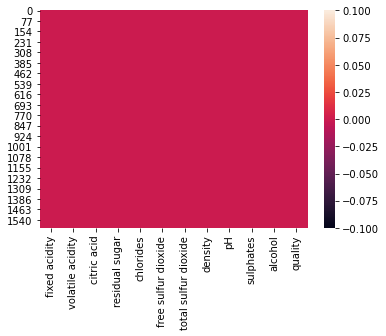

In [8]:
sns.heatmap(wine_quality.isnull())

In [9]:
wine_quality.quality.unique()

array([5, 6, 7, 4, 8, 3])

there are 6 different kind of the quality category from 3 to 8.

in which, 3 is considered as the poor where 8  is concidered as the good.

In [10]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'fixed acidity'),
  Text(0, 1.5, 'volatile acidity'),
  Text(0, 2.5, 'citric acid'),
  Text(0, 3.5, 'residual sugar'),
  Text(0, 4.5, 'chlorides'),
  Text(0, 5.5, 'free sulfur dioxide'),
  Text(0, 6.5, 'total sulfur dioxide'),
  Text(0, 7.5, 'density'),
  Text(0, 8.5, 'pH'),
  Text(0, 9.5, 'sulphates'),
  Text(0, 10.5, 'alcohol'),
  Text(0, 11.5, 'quality')])

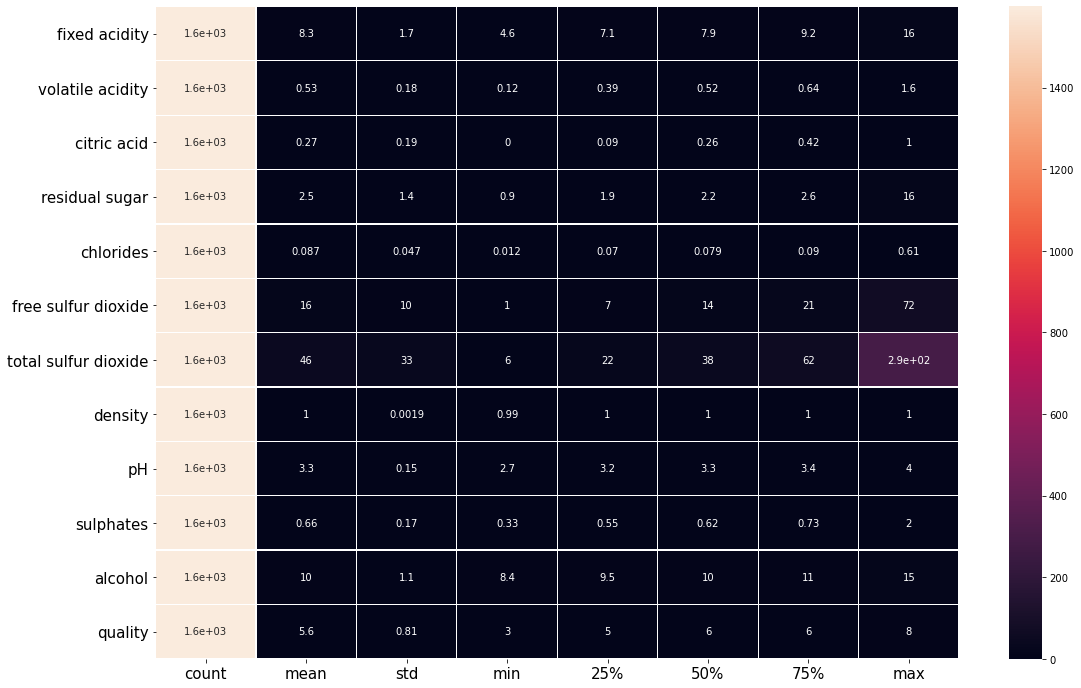

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(data=wine_quality.describe().transpose(),annot=True ,linecolor='white', linewidths=0.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

details gathered from Heatmap:

otal number of rows and columns in dataset:

1.1599 rows

2.12 columns

Fixed acidity:

     1.Mean=8.32
     2.std=1.74
     3.max_value=15.90
     4.min_value=4.60

Volatile acidity:

     1.Mean=8.53
     2.std=0.18
     3.max_value=1.58
     4.min_value=0.12

Citric acid:

     1.Mean=0.27
     2.std=0.19
     3.max_value=1.00
     4.min_value=0.00

Residual sugar:

     1.Mean=2.54
     2.std=1.41
     3.max_value=15.50
     4.min_value=0.90
     
Chlorides:

     1.Mean=0.09
     2.std=0.05
     3.max_value=0.61
     4.min_value=0.01

Free sulfur dioxide:

     1.Mean=15.87
     2.std=10.46
     3.max_value=72.00
     4.min_value=1.00

Total sulfur dioxide:

     1.Mean=46.47
     2.std=32.90
     3.max_value=289.00
     4.min_value=6.00

Density:

     1.Mean=1.00
     2.std=0.00
     3.max_value=1.00
     4.min_value=0.99

pH:

     1.Mean=3.31
     2.std=0.15
     3.max_value=4.01
     4.min_value=2.74

Sulphates:

     1.Mean=0.66
     2.std=0.17
     3.max_value=2.00
     4.min_value=0.33

Alcohol:

     1.Mean=10.42
     2.std=1.07
     3.max_value=14.90
     4.min_value=8.40

Quality:

     1.Mean=5.64
     2.std=0.81
     3.max_value=8.00
     4.min_value=3.00

in which quality is output whether other factors are input variable.



# Correlation

<AxesSubplot:>

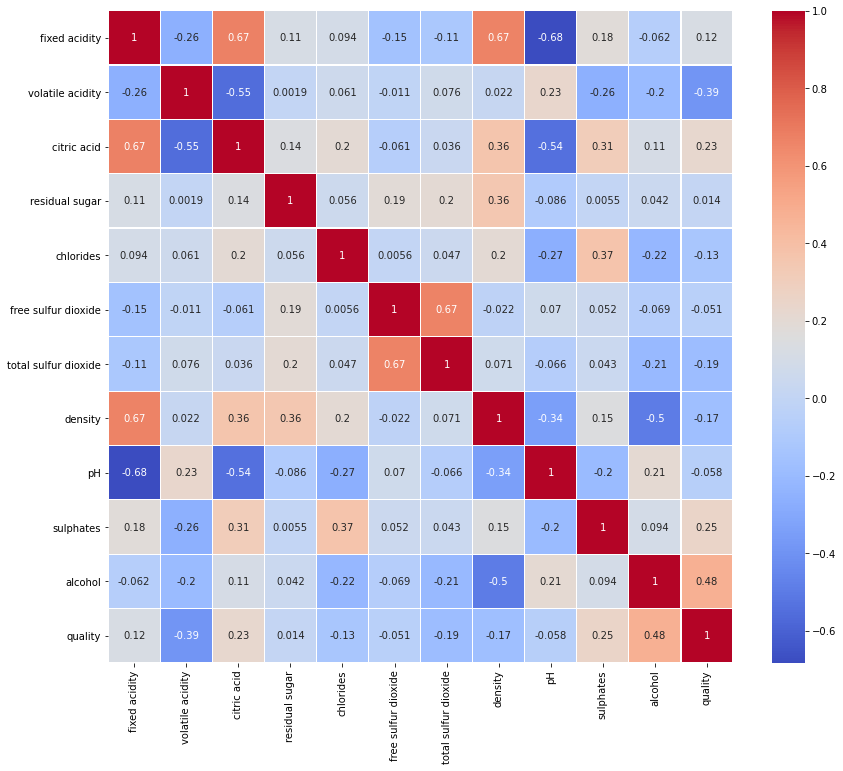

In [12]:
wine_quality.corr()
plt.figure(figsize=(14,12))
sns.heatmap(data=wine_quality.corr(),cmap='coolwarm' , linecolor='white', linewidths=0.2 , annot=True)

Some obervation from the heatmap are listed below.

1:- Alcohol is the highest correlated to Quality.

2:- Volatile acidity shows the highest negative correlation with quality. Apart from this Chlorides,Free sulfur dioxide,pH,Density,Total sulfur dioxide also shos neggative correlation with quality.

3:- fixed Acidity and density are highly  negative correlated.

4:- free sulphar dioxide and total sulphar dioxide also highly correlated to each other.


# Checking the outlier

<AxesSubplot:>

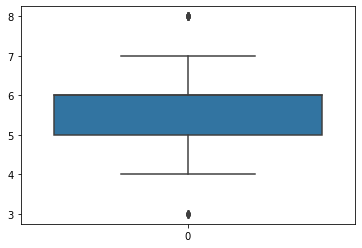

In [13]:
sns.boxplot(data=wine_quality.quality)

<AxesSubplot:>

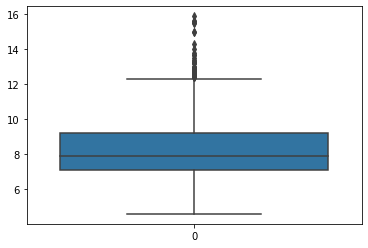

In [14]:
sns.boxplot(data=wine_quality['fixed acidity'])

There are some outlier present in fixed acidity

<AxesSubplot:>

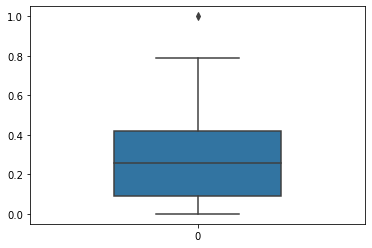

In [15]:
sns.boxplot(data=wine_quality['citric acid'], width=0.5)

the number of outliers is very less.

<AxesSubplot:>

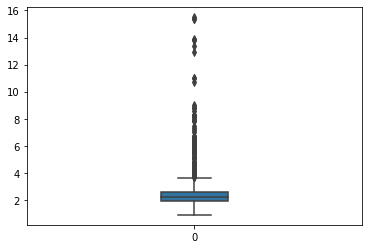

In [16]:
sns.boxplot(data=wine_quality['residual sugar'], width=0.2)

there are lots of outlier present in residual sugar.

<AxesSubplot:>

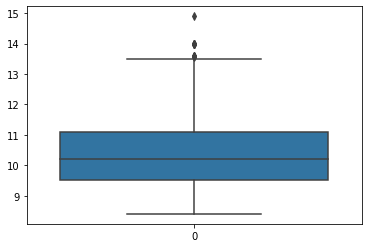

In [17]:
sns.boxplot(data=wine_quality['alcohol'])

there are some outliers are present in alcohol

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

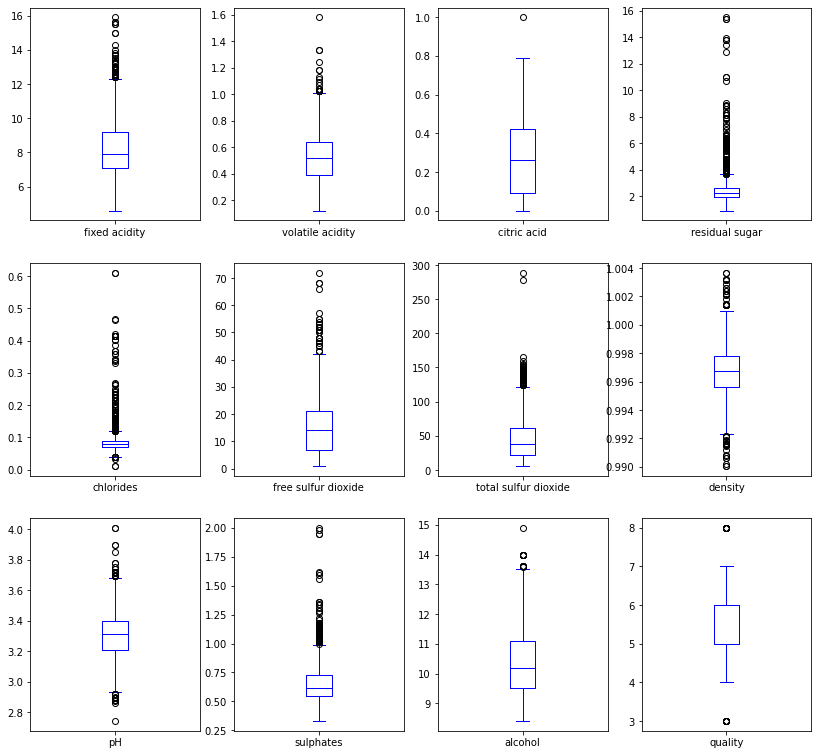

In [18]:
wine_quality.plot(kind='box', subplots = True, layout = [4,4], figsize= [14,18] , color = 'blue')

As per the observation in multivariate observation sulphates, pH,density, chlorides, residual sugar, free sulphar dioxide and total sulphar dioxide consist large number of outliers.

# skewness

In [19]:
wine_quality.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

As considering the threshold +/-0.5 we can see the there are some of the factor in which data is skewed.
fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates these column show the skewness.

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

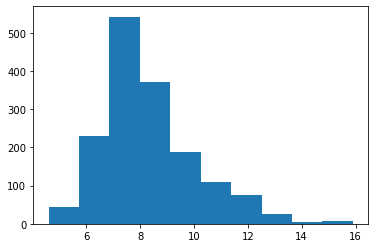

In [20]:
plt.hist(data=wine_quality , x='fixed acidity')

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

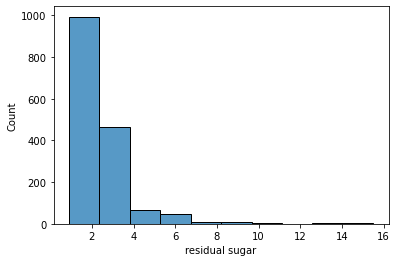

In [21]:
sns.histplot(data=wine_quality, x='residual sugar', bins=10)

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

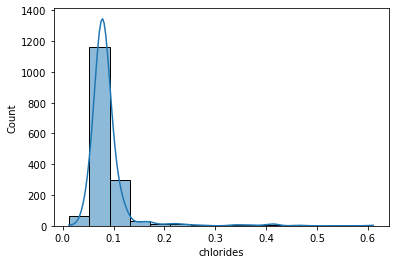

In [22]:
sns.histplot(data=wine_quality, x= 'chlorides', bins=15, kde=True)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

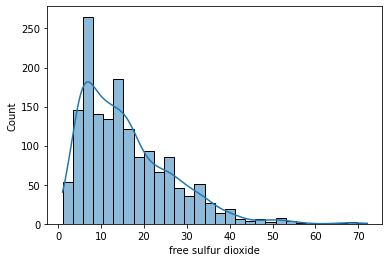

In [23]:
sns.histplot(data=wine_quality, x='free sulfur dioxide', kde=True)

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

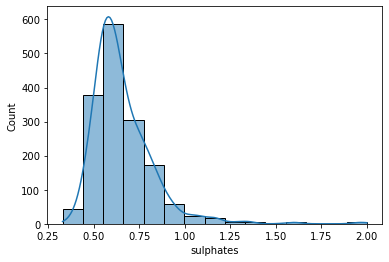

In [24]:
sns.histplot(data=wine_quality, x='sulphates', bins=15 , kde= True)

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

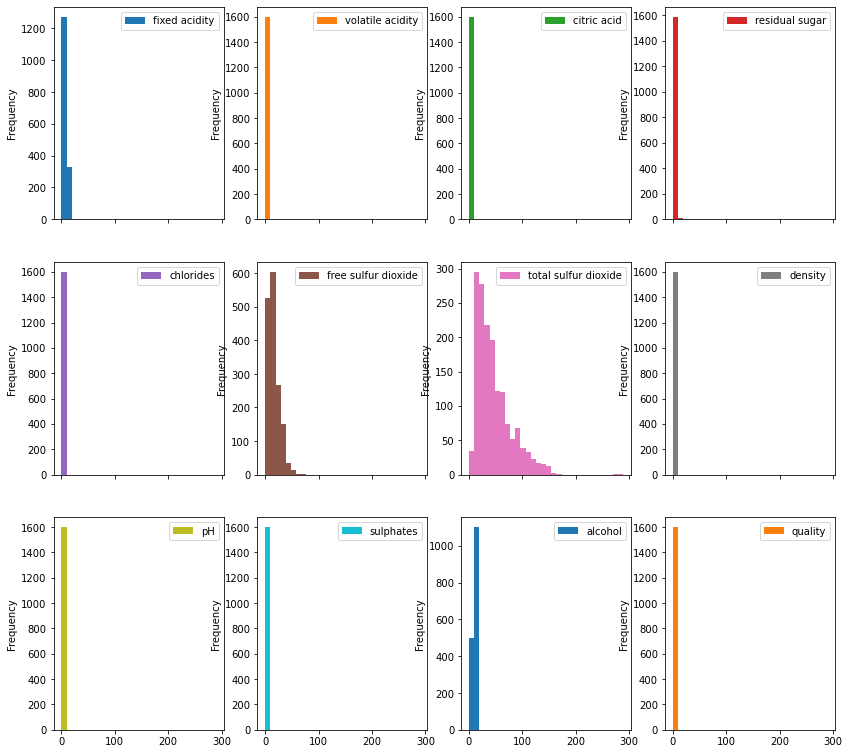

In [25]:
wine_quality.plot(kind='hist', subplots= True, layout= [4,4], figsize= [14,18], bins=30)

As observed that data is skewed a bit in most of the column and no normal distribution is present in most of the columns.

# Removing the outliers

In [26]:
from scipy.stats import zscore
z =np.abs(zscore(wine_quality))
#checking the zscore of every column

In [27]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [28]:
wine_quality_new= wine_quality[(z<3).all(axis=1)]

In [29]:
wine_quality_new.shape

(1451, 12)

In [30]:
wine_quality.shape

(1599, 12)

In [31]:
#finding the percentage of data loss while removing the outlier
dataloss= ((1599-1451)/1599)*100
dataloss

9.255784865540964

As per the observation the percentage of data loss is 9.26% so we can not drop the outliers.

# Removing  Skewness

In [32]:
# before rememoving the data we will split the data in input and output variable.
x = wine_quality.iloc[:,0:-1]
y = wine_quality.iloc[:,-1]


In [33]:
x.shape

(1599, 11)

In [34]:
y.shape

(1599,)

In [35]:
# calling power tranform for removing the skewness

from sklearn.preprocessing import power_transform
x_new= power_transform(x)
df = pd.DataFrame(x_new, columns=x.columns)

In [36]:
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002822
sulphates               0.009985
alcohol                 0.112372
dtype: float64

After using power transform the skewness is reduced  under the considerable threshold +/- 0.5

In [37]:
x=df

In [38]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025


In [39]:
y.sample(5)

1405    7
117     6
730     5
1112    6
743     5
Name: quality, dtype: int64

# Apply for standard scaller

In [40]:
# calling standard scaller
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         1.27568966e+00, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129874e+00, -1.53110932e+00, ...,
        -7.09517441e-01,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
        -3.10054087e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87059824e-04, -6.83293826e-01, ...,
         7.18868609e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552768e-01, -7.43826364e-01, ...,
         1.63859531e+00,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
         5.29831606e-01,  2.56369273e-01,  7.34557526e-01]])

# As per the careful observation there are number of output but that can harm the accuracy and prediction so we will convert them into 2 output.

In [48]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

we will convert the labels into 2 output. 
value less than or equal to 7 will be considered as 0. and rest of the value which are greater than 7 is considered as 1.

In [58]:
y  =y.apply(lambda i: 1 if i>6.5 else 0)

In [59]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [60]:
print(x.shape)


(1599, 11)


In [61]:
print(y.shape)

(1599,)


<AxesSubplot:xlabel='quality', ylabel='Count'>

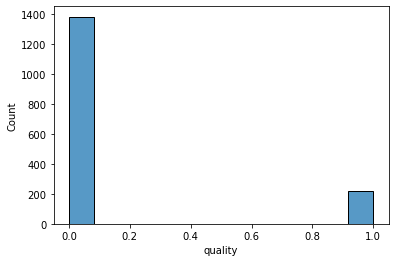

In [62]:
sns.histplot(data=y)

As per the observation the output 0 is comparetively higher than output 1 so it is imbalanced dataset so we will make this output as balance

In [63]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y= sm.fit_resample(x,y)


In [64]:
y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

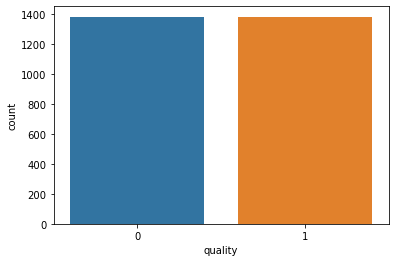

In [65]:
sns.countplot(y)

After SMOTE all the quality output became equal so now it is balanced and bigger.

In [68]:
x.shape

(2764, 11)

In [89]:
y.shape

(2764,)

# Split and Model selection

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [82]:
# finding the optimum random state

Accuracy=0

random_state=0

for i in range(0,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y, test_size=0.20 ,random_state=i)
    lr=LogisticRegression()
    lr.fit(train_x,train_y)
    predlr= lr.predict(test_x)
    acc=accuracy_score(test_y,predlr)
    
    if acc>Accuracy:
        Accuracy=acc
        random_state=i
        
print('best accuarcy is:' ,Accuracy,'at random state for ' ,random_state)
    

best accuarcy is: 0.8770343580470162 at random state for  473


# The random state will be 473 for the highest accuracy.

In [91]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20 ,random_state=473)

In [92]:
train_x.shape

(2211, 11)

In [93]:
train_y.shape

(2211,)

# Finding out the best model

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

lr= LogisticRegression()
dt= DecisionTreeClassifier()
knn= KNeighborsClassifier()
svc= SVC()
rf= RandomForestClassifier()

list= [lr,dt,knn,svc,rf]

for i in list:
    i.fit(train_x,train_y)
    pred_i=i.predict(test_x)
    print('the accuracy of ' ,i ,'is', accuracy_score(test_y,pred_i))
    print('the classification report of' , i ,'is',classification_report(test_y,pred_i))
    print('the confusion metrix of ', i,'is',confusion_matrix(test_y,pred_i) )
    print('\n')

the accuracy of  LogisticRegression() is 0.8770343580470162
the classification report of LogisticRegression() is               precision    recall  f1-score   support

           0       0.91      0.82      0.86       259
           1       0.86      0.93      0.89       294

    accuracy                           0.88       553
   macro avg       0.88      0.87      0.88       553
weighted avg       0.88      0.88      0.88       553

the confusion metrix of  LogisticRegression() is [[213  46]
 [ 22 272]]


the accuracy of  DecisionTreeClassifier() is 0.9095840867992767
the classification report of DecisionTreeClassifier() is               precision    recall  f1-score   support

           0       0.90      0.91      0.90       259
           1       0.92      0.91      0.91       294

    accuracy                           0.91       553
   macro avg       0.91      0.91      0.91       553
weighted avg       0.91      0.91      0.91       553

the confusion metrix of  DecisionTreeC

# Among all the models the highest accuracy score is provided by Random forest with 96.7%.

# ~ Checking the Crossvalidation score

In [108]:
from sklearn.model_selection import cross_val_score
lr= LogisticRegression()
dt= DecisionTreeClassifier()
knn= KNeighborsClassifier()
svc= SVC()
rf= RandomForestClassifier()

list= [lr,dt,knn,svc,rf] 
for m in list:
    cv_score= cross_val_score(i,x,y,cv=5)
    print('cross validation score of ', m,'is:', cv_score.mean())
    print('\n')
    

cross validation score of  LogisticRegression() is: 0.920764866210656


cross validation score of  DecisionTreeClassifier() is: 0.9153412217941662


cross validation score of  KNeighborsClassifier() is: 0.9128036795345545


cross validation score of  SVC() is: 0.916064549099772


cross validation score of  RandomForestClassifier() is: 0.9149749718269256




# In this observation the cross_val score of Logistic regression has the highest CV score amoung other models but the accuracy score is lowest among all the models and by considering the accuracy score and least diiference between accuracy score and CV score we choose RandomForestClassifier as the optimum model with accuracy score of 97%.

# Hyper parameter tunning

In [118]:
#calling grid search CV
from sklearn.model_selection import GridSearchCV

#creating a dictionary to find the optimum critirian and depth
parameter = {'max_depth':np.arange(2,10),'criterion':['gini','entropy']}
rf = RandomForestClassifier()


In [119]:
Grid_search_cv = GridSearchCV(estimator=rf,param_grid=parameter, cv=5)
Grid_search_cv.fit(train_x,train_y)
Grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [120]:
Grid_search_cv_pred= Grid_search_cv.predict(test_x)
print(accuracy_score(test_y,Grid_search_cv_pred))

0.9547920433996383


# Final accuracy score is 95%.

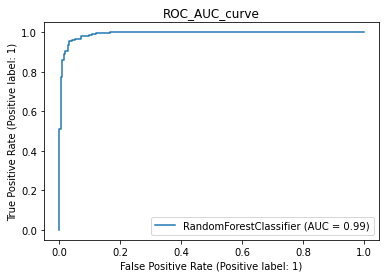

In [121]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Grid_search_cv.best_estimator_,test_x,test_y)
plt.title('ROC_AUC_curve')
plt.show()

# AUC score is 99%.

In [122]:
import joblib
joblib.dump(Grid_search_cv.best_estimator_,'Red_wine_quality.pk1')

['Red_wine_quality.pk1']